# Using KASPAH dataset as benchmark remove low-quality KLEBPAVIA assemblies

In [64]:
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'jupyterlab'

pd.set_option('display.max_columns', None)

missing_assemblies = ['SPARK_2692_C2', 'SPARK_2696_C1', 'SPARK_2717_C1', 'SPARK_2737_C1', 'SPARK_2738_C1', 'SPARK_2738_C2', 'SPARK_2739_C1', 'SPARK_2740_C1', 
                      'SPARK_2741_C1', 'SPARK_2742_C1', 'SPARK_2743_C1', 'SPARK_2744_C1', 'SPARK_2744_C2', 'SPARK_2747_C2', 'SPARK_2748_C1', 'SPARK_2748_C2', 
                      'SPARK_2749_C1', 'SPARK_2749_C2', 'SPARK_2750_C1', 'SPARK_2756_C1', 'SPARK_2757_C1', 'SPARK_2758_C1', 'SPARK_2758_C3', 'SPARK_2761_C1', 
                      'SPARK_2761_C2', 'SPARK_2809_C1', 'SPARK_2811_C1']

In [44]:
kph_table = 'data/kaspah.tsv'
kbv_table = 'data/klebpavia.tsv'
pgw_table = 'data/pathogenwatch.tsv'

kph_df = pd.read_csv(kph_table, sep='\t')
kbv_df = pd.read_csv(kbv_table, sep='\t')

kph_df.rename({'assembly_ID': 'id'}, axis=1, inplace=True)

kph_df['DB'] = 'KPH'
kbv_df['DB'] = 'KBV'

# genomes discarded in KBV papre
kbv_df.loc[kbv_df['id'].isin(missing_assemblies) , 'DB'] = 'KBV-missing'

# differentiate between hybrid and illumina-only assemblies
filt_complete = (kph_df['ONT_data'] == 'complete')
kph_df.loc[filt_complete, 'DB'] = 'KPH-hybrid'

In [45]:
cols = ['id', 'ncontigs', 'N_count', 'N50', 'Gaps', 'DB']

kph_df = kph_df[cols]
kbv_df = kbv_df[cols]

df = pd.concat([kph_df, kbv_df])

kph_df.shape, kbv_df.shape

((391, 6), (3510, 6))

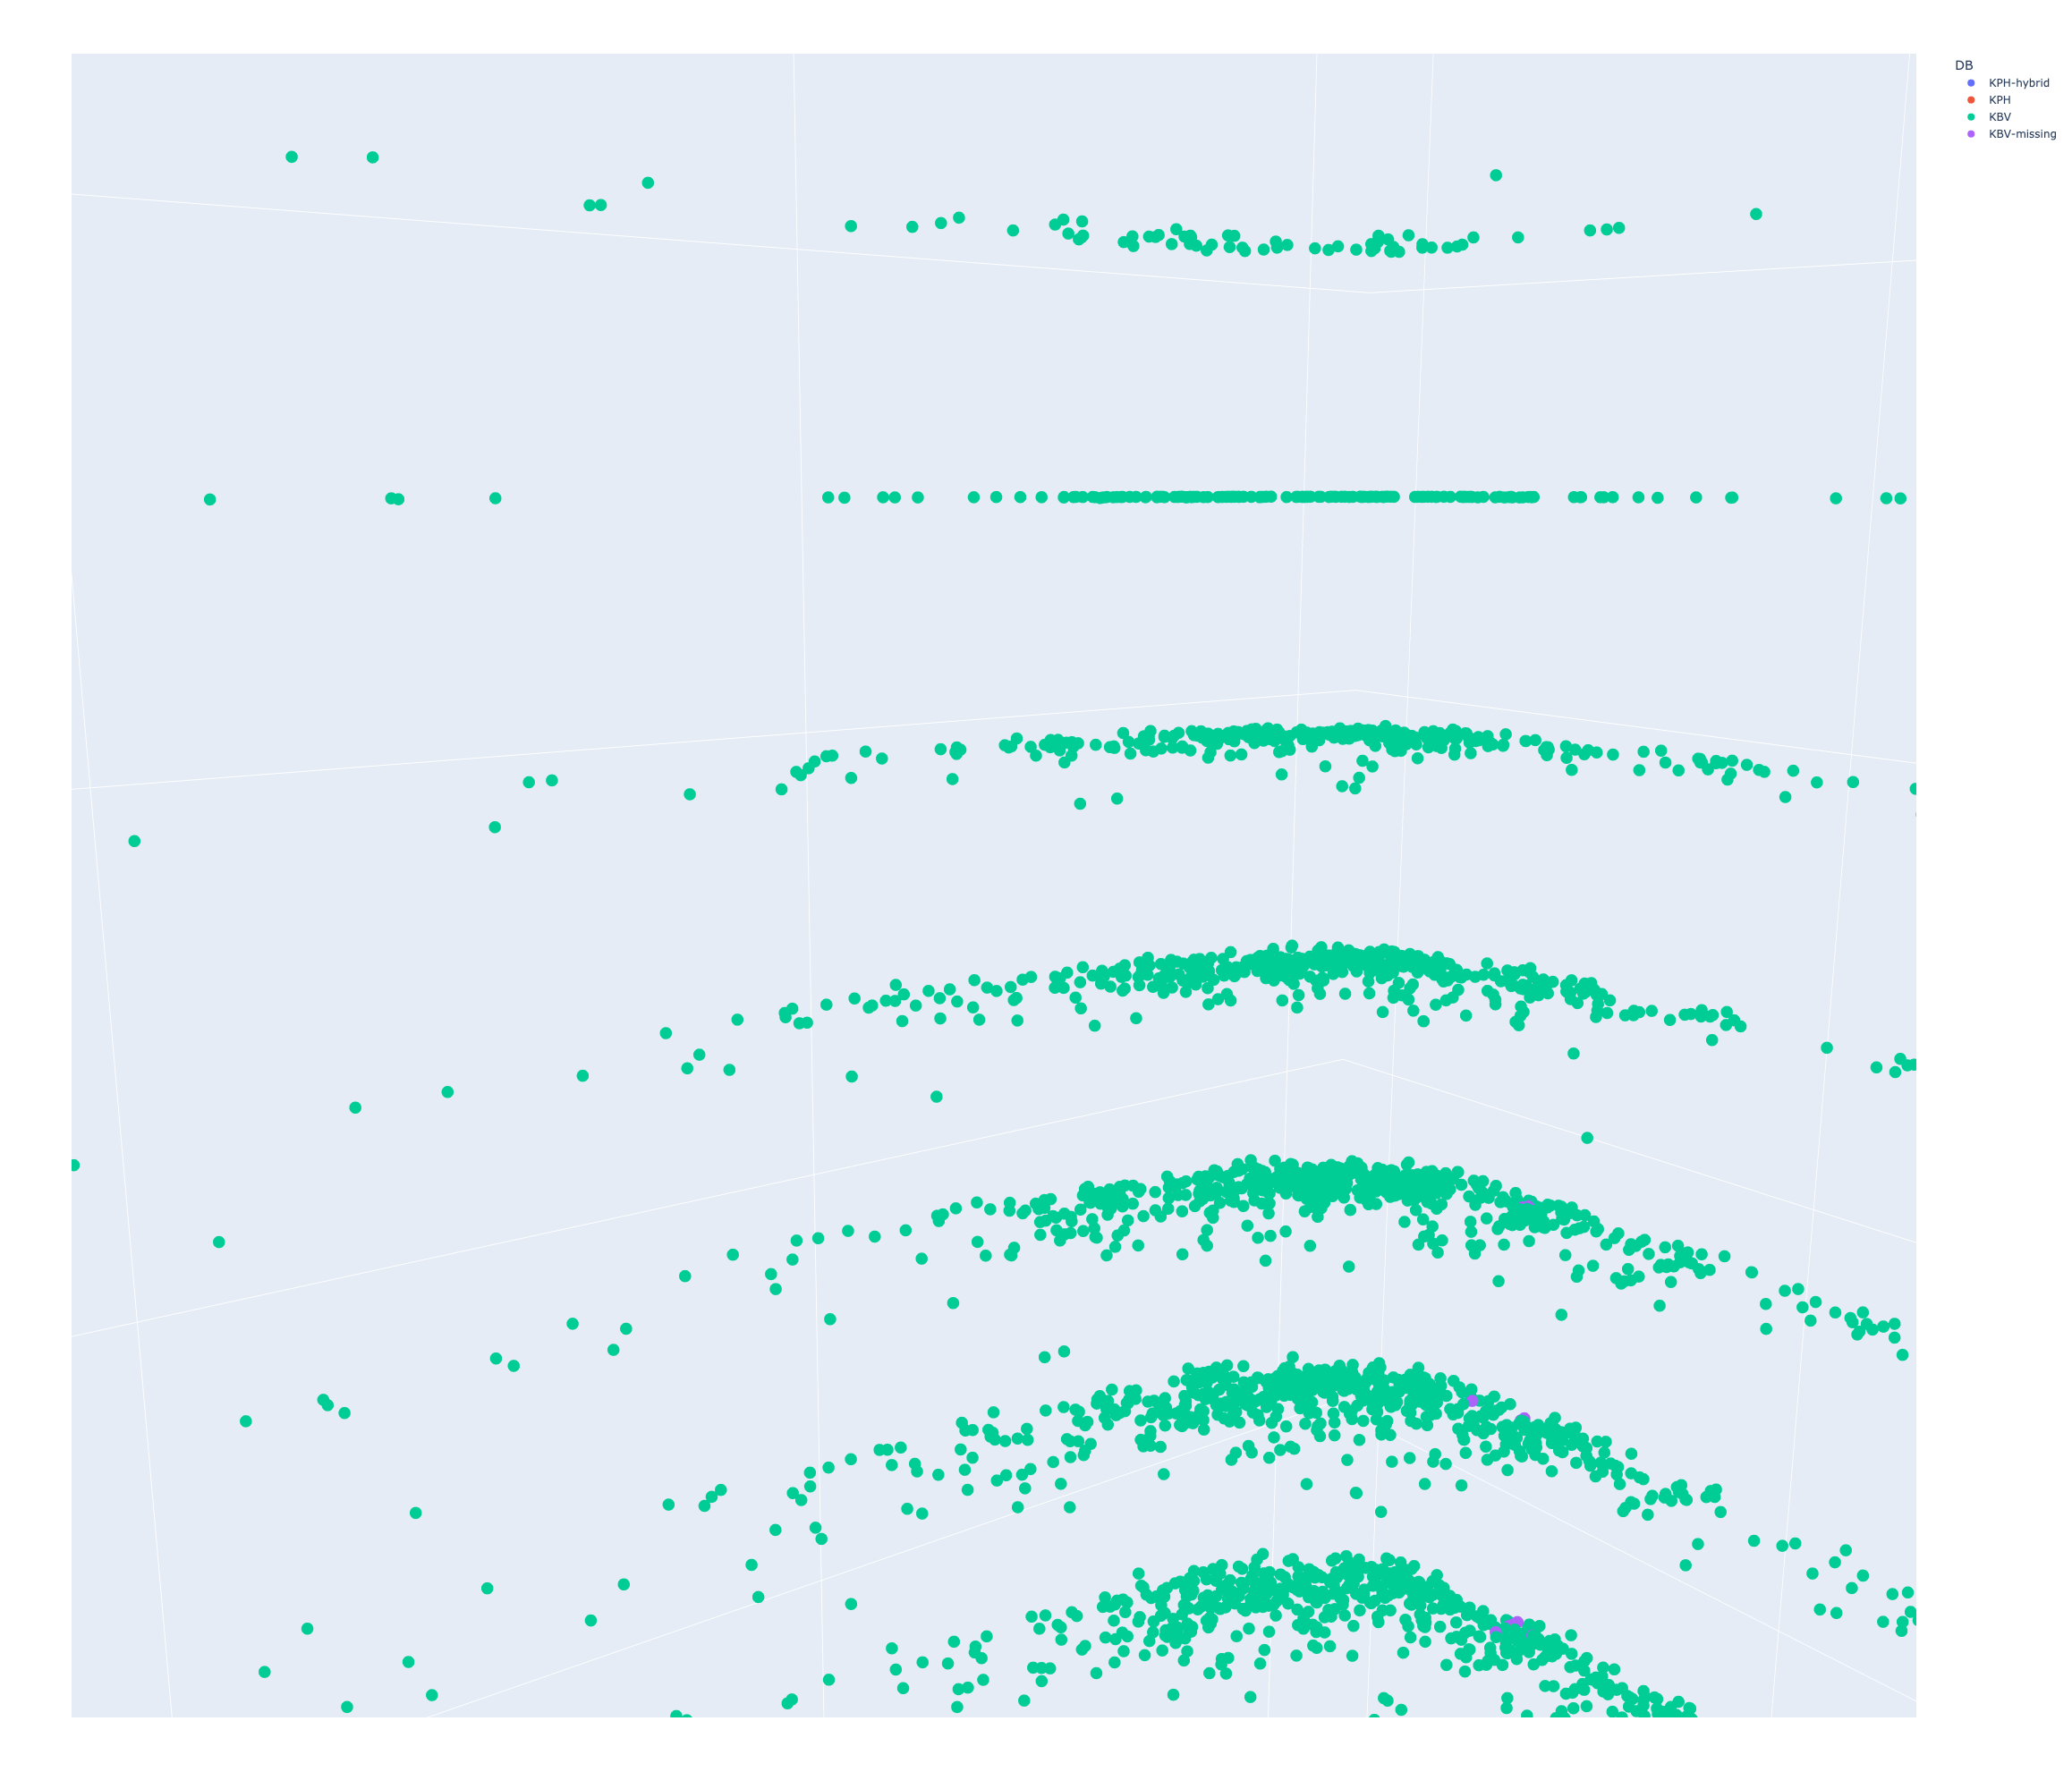

In [79]:
fig = px.scatter_3d(df, x='ncontigs', y='N50', z='Gaps', color='DB', width=1400, height=2000)
fig.show()

# Assemblies to remove from analysis (ncontigs > 300)
### - 10 of assemblies were already analyzed in KBV_P1
### - 7 of assemblies were removed from analysis of KBV_P2

In [78]:
low_quality_assemblies = ['SPARK_1407_C1', 'SPARK_1422_C1', 'SPARK_1494_C1', 
                          'SPARK_1494_C3', 'SPARK_1496_C1', 'SPARK_1498_C1', 
                          'SPARK_1516_C1', 'SPARK_1534_C1', 'SPARK_1541_C1', 
                          'SPARK_1562_C1', 'SPARK_2776_C2', 'SPARK_2841_C2', 
                          'SPARK_370_C2', 'SPARK_375_C1', 'SPARK_396_C1', 
                          'SPARK_400_C1', 'SPARK_454_C1']

assemblies_already_analyzed_in_KBV_P1 = ['SPARK_1407_C1', 'SPARK_1422_C1', 'SPARK_1494_C1', 'SPARK_1494_C3', 
                                         'SPARK_1496_C1', 'SPARK_1498_C1', 'SPARK_1516_C1', 'SPARK_1534_C1', 
                                         'SPARK_1541_C1', 'SPARK_1562_C1']

assemblies_removed_in_KBV_P2 = ['SPARK_2776_C2', 'SPARK_2841_C2', 'SPARK_370_C2', 
                                'SPARK_375_C1', 'SPARK_396_C1', 'SPARK_400_C1', 'SPARK_454_C1']

# Pathogenwatch

In [98]:
pgw_table = 'data/pathogenwatch.tsv'
pgw_df = pd.read_csv(pgw_table, sep='\t')

filt_n50 = (pgw_df['N50'] > 0.3 * 10**6)
filt_ncontigs = (pgw_df['ncontigs'] <= 300)
filt_gaps = (pgw_df['Gaps'] <= 50)

pgw_df.loc[filt_n50 & filt_ncontigs & filt_gaps]

,filename,total_length,ncontigs,mean_length,longest,shortest,N_count,Gaps,N50,N50n,N70,N70n,N90,N90n
4,DRR061412.fasta,5391695,48,112326.98,748542,526,1383,14,458237,5,362888,8,86466,14
9,DRR065574.fasta,5657808,94,60189.45,915219,525,199,2,367905,5,214534,10,41302,23
10,DRR065575.fasta,6008326,65,92435.78,679100,603,591,6,380597,6,191883,11,51795,23
11,DRR065576.fasta,6030999,75,80413.32,634526,549,604,7,329945,7,160960,12,68720,23
23,DRR065591.fasta,5771614,53,108898.38,822981,531,1676,17,326239,6,214991,10,76183,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,SRR9858950.fasta,5555198,88,63127.25,1109774,509,796,8,364438,5,216236,8,54854,17
32489,SRR9858959.fasta,5453481,57,95675.11,924096,508,497,5,388483,5,295092,8,79690,16
32492,SRR9858962.fasta,5510105,36,153058.47,1400970,553,399,4,441124,4,307052,7,91694,12
32498,SRR9858968.fasta,5670542,178,31856.98,498191,500,487,5,304911,8,146799,14,34821,28


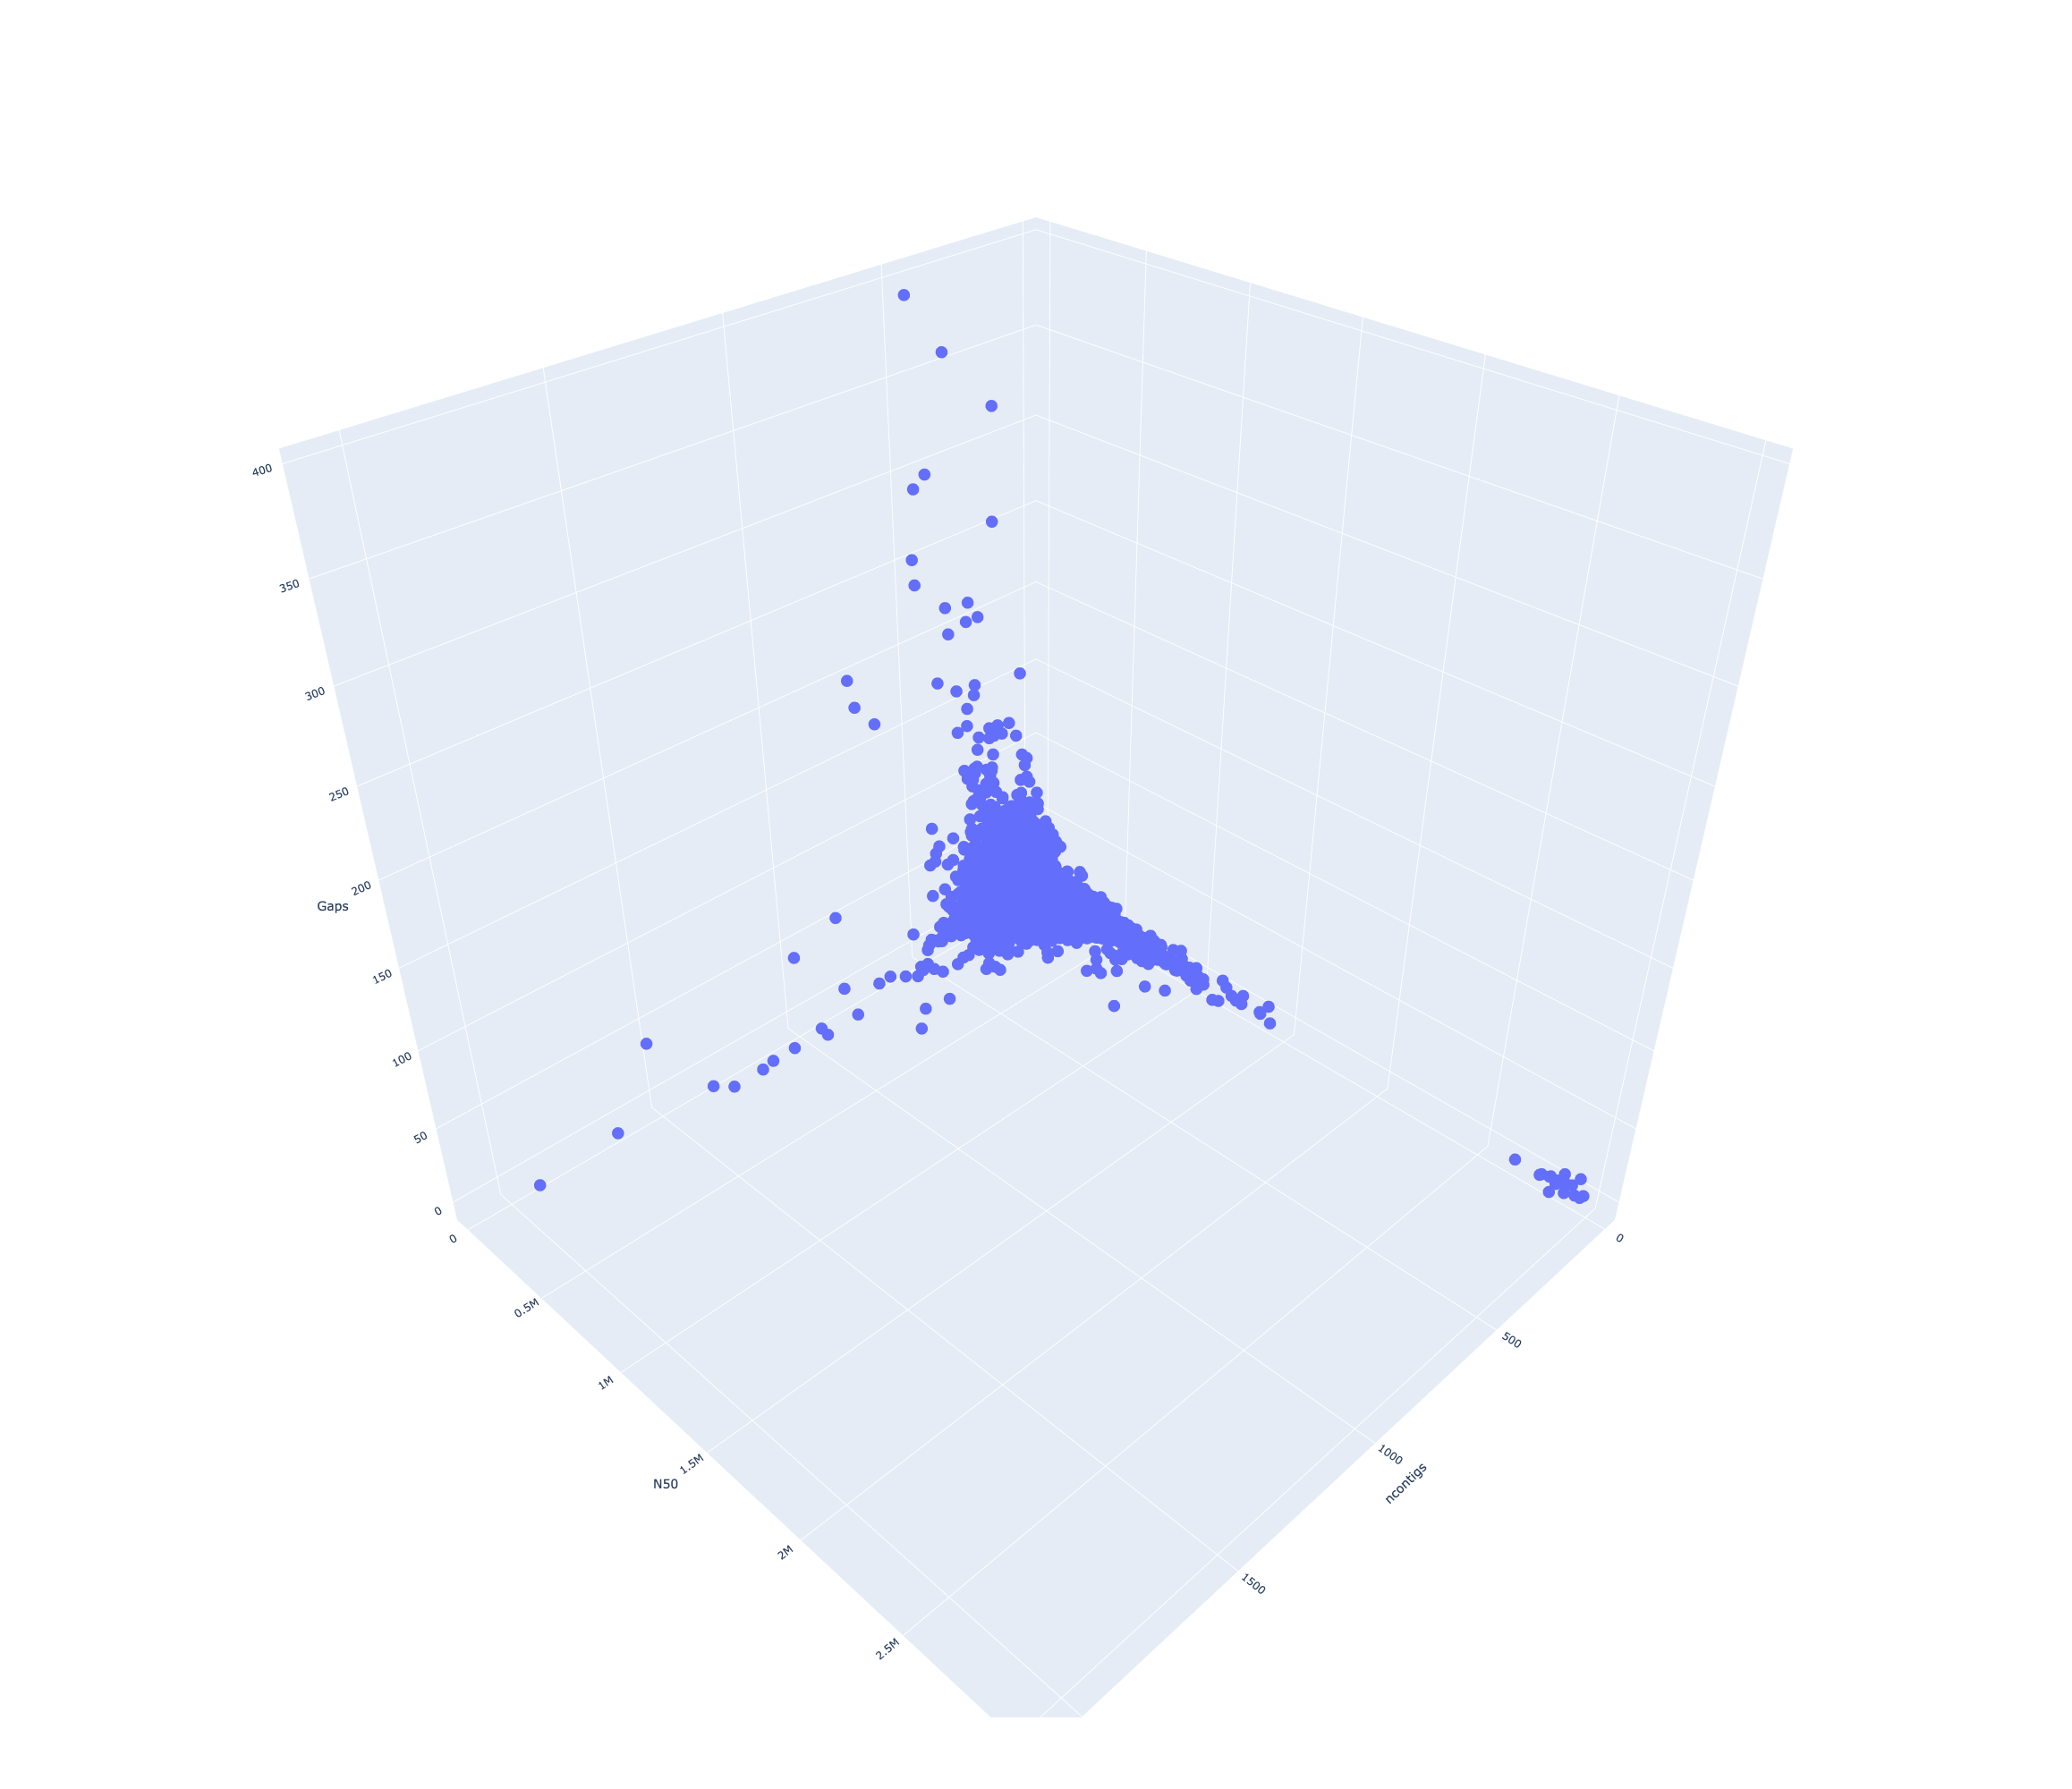

In [99]:
fig = px.scatter_3d(pgw_df, x='ncontigs', y='N50', z='Gaps', width=1400, height=2000)
fig.show()